In [4]:
import pandas as pd
import seaborn as sns
# 파일 경로 지정
file_path = r"C:\Users\samso\OneDrive\바탕 화면\UCSD\Visualization\Project4\Submission1\bike.csv"

# 엑셀 파일 읽기
df = pd.read_csv(file_path, encoding='cp949')  # 또는 'euc-kr'

# 상위 5행 출력
print(df.head())
import matplotlib.pyplot as plt

         Date  Rented Bike Count  Hour  Temperature(캜)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1           

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
pd.DataFrame(df.groupby('Date')['Rented Bike Count'].sum())[pd.DataFrame(df.groupby('Date')['Rented Bike Count'].sum())['Rented Bike Count']==0].index

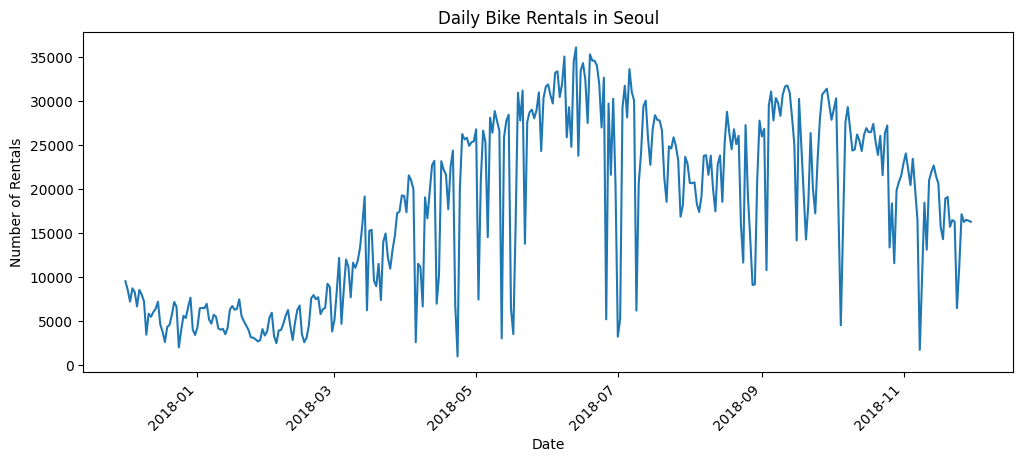

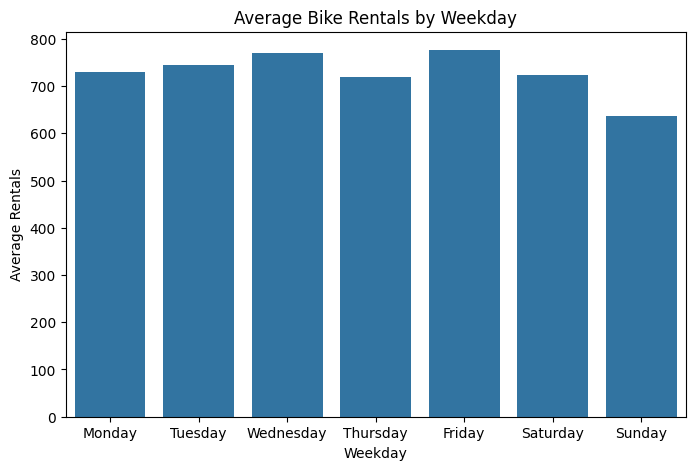

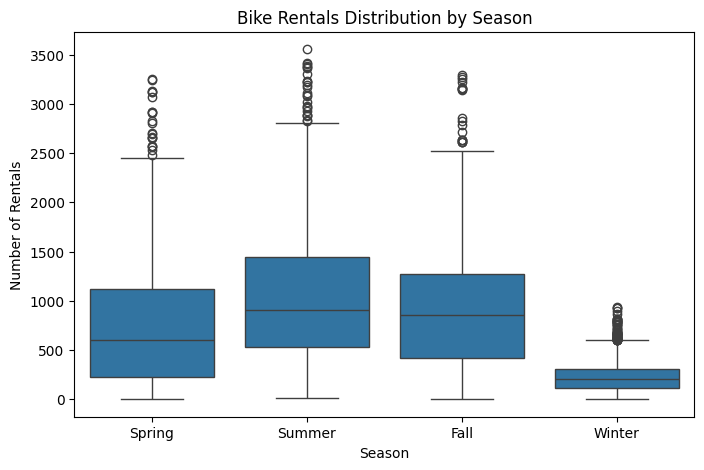

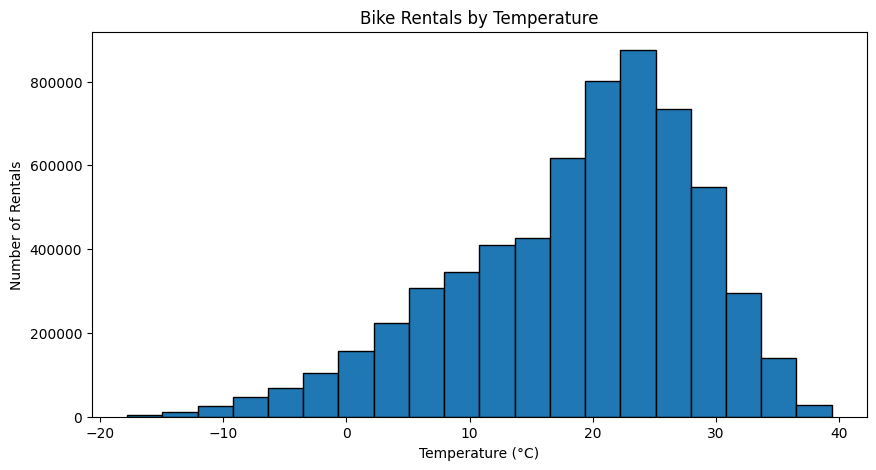

c:\Users\samso\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\samso\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


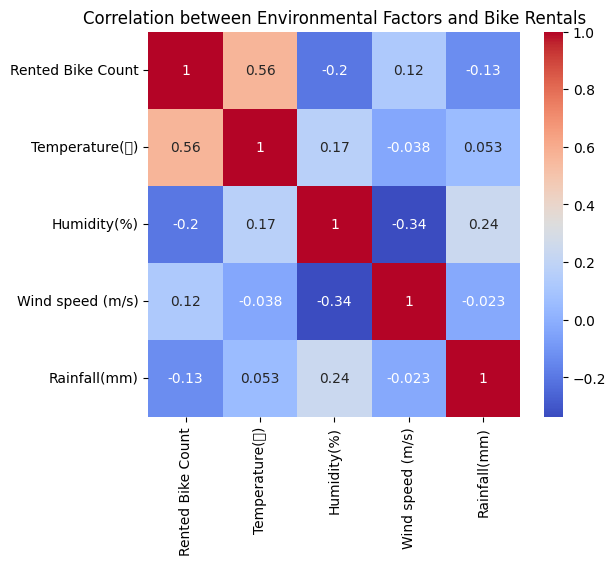

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CSV 읽기 (인코딩 문제 해결)
file_path = r"C:\Users\samso\OneDrive\바탕 화면\UCSD\Visualization\Project4\Submission1\bike.csv"
df = pd.read_csv(file_path, encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# 1️⃣ 일별 대여량 계산
daily_rentals = df.groupby('Date')['Rented Bike Count'].sum()

# 2️⃣ 총 대여량이 0인 날짜 추출
zero_dates = daily_rentals[daily_rentals == 0].index

# 3️⃣ 원본 데이터에서 해당 날짜 제거
df = df[~df['Date'].isin(zero_dates)]

# 요일 컬럼 생성
df['Weekday'] = df['Date'].dt.day_name()


# 1️⃣ 일별 총 대여량 추이
plt.figure(figsize=(12,5))
daily_rentals = df.groupby('Date')['Rented Bike Count'].sum()
daily_rentals.plot()
plt.title("Daily Bike Rentals in Seoul")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ 요일별 평균 대여량 (Bar Plot)
plt.figure(figsize=(8,5))
sns.barplot(x='Weekday', y='Rented Bike Count', data=df, errorbar=None,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Average Bike Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Rentals")
plt.show()

# 3️⃣ 월별/계절별 대여량 분포 (Box Plot)
df['month'] = pd.to_datetime(df['Date']).dt.month

def month_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(month_to_season)

plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='Rented Bike Count', data=df, order=['Spring','Summer','Fall','Winter'])
plt.title("Bike Rentals Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Number of Rentals")
plt.show()



plt.figure(figsize=(10,5))
plt.hist(df['Temperature(캜)'], bins=20, weights=df['Rented Bike Count'], edgecolor='black')
plt.title("Bike Rentals by Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Rentals")
plt.show()



# 5️⃣ 강수량/습도와 대여량 히트맵 (Correlation Heatmap)
corr = df[['Rented Bike Count','Temperature(캜)','Humidity(%)','Wind speed (m/s)','Rainfall(mm)']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Environmental Factors and Bike Rentals")
plt.show()

# Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
#        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
#        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
#        'Holiday', 'Functioning Day'],
#       dtype='object')

